In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
drilldf = pd.read_csv('./phaseone-drill.csv')

In [5]:
drilldf.head()

,Category Name,Unit,Price
0,Impact Drill,Piece,2
1,Impact Drill,Piece,675
2,Impact Drill,Piece,766
3,Impact Drill,Piece,900
4,Impact Drill,Piece,1000


In [6]:
units=drilldf['Unit'].unique()
units

array(['Piece', 'Piece(s)', 'pack', 'unit', 'Number', 'Unit', 'Pack',
       '1nos', 'Unit(s)', 'kit', 'Set', 'Pc_Onwards', 'ONWARDS', 'Kit'],
      dtype=object)

In [7]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Pc_Onwards      5
Piece(s)        5
Kit             1
kit             1
ONWARDS         1
Set             1
Unit(s)         1
1nos            1
Name: Unit, dtype: int64

In [0]:
npa=drilldf['Price'][1:]

In [9]:
drilldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
Category Name    247 non-null object
Unit             247 non-null object
Price            247 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [14]:
drilldf[1:].describe()

Price    9554.054996
dtype: float64

In [22]:
stdev=np.std(npa)
print(stdev)

9534.61641034422


In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

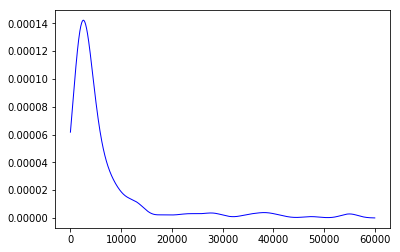

In [24]:
y_grid=np.linspace(0,60000,1000)
ideal=1.06*(np.std(npa))*((len(npa)**(-1/5)))
pdf = kde_scipy(npa, y_grid, bandwidth=ideal/2)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)

In [33]:
np.sum(pdf)*60

0.935348379935688

In [34]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
  if np.sum(pdf[f_peak-q:f_peak+q])*60 > 0.5:
    print(np.sum(pdf[f_peak-q:f_peak+q])*60,q)
    break
print((f_peak-q)*60,(f_peak+q)*60)

0.5020798337819504 34
540 4620


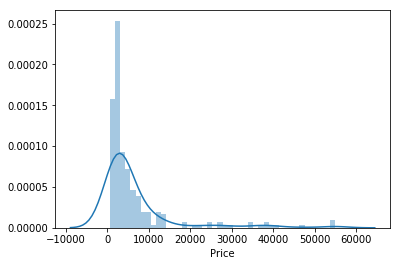

In [25]:
sns.distplot(drilldf['Price'][1:]);

In [0]:
sns.distplot(df_train['Price'][1:], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Price'][1:], plot=plt)

In [0]:
plt.scatter(drilldf['Price'],array);

In [0]:
array=np.arange(247)+1;array